In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torch.distributions import Normal
from torch.distributions.kl import kl_divergence
import sys
sys.path.append('..')

[   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
  100.  105.  110.  115.  120.  125.  130.  135.  140.  145.  150.  155.
  200.  205.  210.  215.  220.  225.  230.  235.  240.  245.  250.  255.
  300.  305.  310.  315.  320.  325.  330.  335.  340.  345.  350.  355.
  400.  405.  410.  415.  420.  425.  430.  435.  440.  445.  450.  455.
  500.  505.  510.  515.  520.  525.  530.  535.  540.  545.  550.  555.
  600.  605.  610.  615.  620.  625.  630.  635.  640.  645.  650.  655.
  700.  705.  710.  715.  720.  725.  730.  735.  740.  745.  750.  755.
  800.  805.  810.  815.  820.  825.  830.  835.  840.  845.  850.  855.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
 1000. 1005. 1010. 1015. 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055.
 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135. 1140. 1145. 1150. 1155.
 1200. 1205. 1210. 1215. 1220. 1225. 1230. 1235. 1240. 1245. 1250. 1255.
 1300. 1305. 1310. 1315. 1320. 1325. 1330. 1335. 13

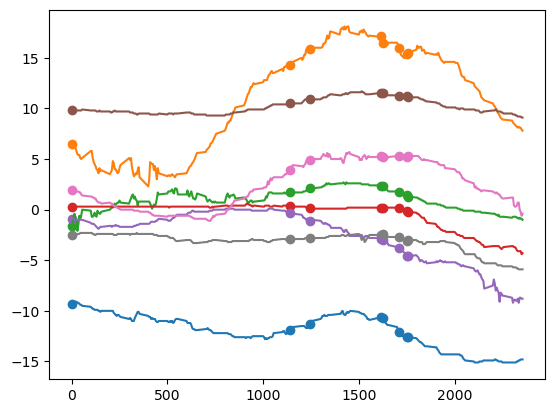

In [2]:
import pandas as pd
from data.tempdata import TempData
import matplotlib.pyplot as plt
# Load the data
data_path = '../data/data_with_desc.csv'
data = pd.read_csv(data_path, header=None)
data_test = TempData(data=data, max_num_context=10)

batch, knowledge = data_test.generate_batch(batch_size=8, return_knowledge=True)

print(knowledge)
for i in range(8):
    x_target = batch.x_target[i].flatten()
    y_target = batch.y_target[i].flatten()
    plt.plot(x_target.numpy(), y_target.numpy())
for i in range(8):
    x_context = batch.x_context[i].flatten()
    y_context = batch.y_context[i].flatten()
    plt.scatter(x_context.numpy(), y_context.numpy())
plt.show()

In [11]:
print(sine_data_test.y_values)

tensor([[ -5.9000,  -5.6000,  -5.2000,  ...,  -8.1000,  -7.9000,  -8.0000],
        [ -8.4000,  -8.5000,  -8.8000,  ..., -16.3000, -16.3000, -16.3000],
        [-16.4000, -16.4000, -16.4000,  ..., -18.3000, -18.3000, -18.2000],
        ...,
        [  8.3000,   9.4000,   9.4000,  ...,   5.4000,   5.6000,   5.1000],
        [  5.2000,   4.7000,   3.9000,  ...,  11.1000,  11.1000,  11.2000],
        [ 11.3000,  11.3000,  11.3000,  ...,  10.4000,  10.4000,  10.3000]])


In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy as np

class TemperatureDataset(Dataset):

    def __init__(self, data: pd.DataFrame, max_num_context: int = 10):
        self.data = data
        self.max_num_context = max_num_context

        x_values = data.iloc[0][1:].values.astype('float32')
        self.x_values = torch.from_numpy(x_values) # Shape: [1, num_points]
        self.y_values_train = torch.tensor(data.iloc[1:508, 1:].values).float()  # Shape: [num_samples, num_points]
        self.y_values_val = torch.tensor(data.iloc[619:, 1:].values).float()  # Shape: [num_samples, num_points]
    
    def __len__(self):
        return len(self.y_values_train)
    
    def __getitem__(self, idx):
        y_values = self.y_values_train[idx]
        num_total_points = self.x_values.size(-1)
        num_context = np.random.randint(low=1, high=self.max_num_context)

        context_indices = np.random.choice(num_total_points, num_context, replace=False)

        x_context = self.x_values[context_indices]
        y_context = y_values[context_indices]

        x_target = self.x_values
        y_target = y_values

        return x_context, y_context, x_target, y_target
    


NeuralProcess(
  (deterministic_encoder): DeterminisitcEncoder(
    (phi): BatchMLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): ReLU()
        (4): Linear(in_features=128, out_features=128, bias=True)
        (5): ReLU()
        (6): Linear(in_features=128, out_features=128, bias=True)
        (7): ReLU()
        (8): Linear(in_features=128, out_features=128, bias=True)
        (9): ReLU()
        (10): Linear(in_features=128, out_features=128, bias=True)
        (11): Identity()
      )
    )
    (rho): Linear(in_features=128, out_features=128, bias=True)
    (cross_attention_block): CrossAttention(
      (q_proj): Linear(in_features=128, out_features=128, bias=True)
      (k_proj): Linear(in_features=128, out_features=128, bias=True)
      (v_proj): Linear(in_features=128, out_features=128, bias=True)
      (o_proj): Linear(in_features=128, 

  0%|          | 0/100001 [00:00<?, ?it/s]

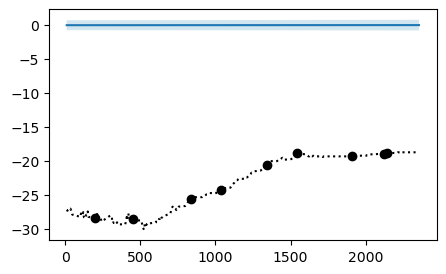

  1%|          | 1005/100001 [00:40<1:08:29, 24.09it/s]

iter 1001: Avg. Loss = 4.226683118343353


  2%|▏         | 2004/100001 [01:18<1:07:34, 24.17it/s]

iter 2001: Avg. Loss = 3.0740803351402284


  3%|▎         | 3004/100001 [01:58<1:03:47, 25.34it/s]

iter 3001: Avg. Loss = 2.4488471393585205


  4%|▍         | 4005/100001 [02:37<1:02:31, 25.59it/s]

iter 4001: Avg. Loss = 2.3951596757173537


  5%|▌         | 5004/100001 [03:15<53:34, 29.55it/s]  

iter 5001: Avg. Loss = 2.3491456322669984


  6%|▌         | 6003/100001 [03:50<54:26, 28.77it/s]  

iter 6001: Avg. Loss = 2.3488600993156434


  7%|▋         | 7004/100001 [04:26<57:08, 27.12it/s]  

iter 7001: Avg. Loss = 2.31147434425354


  8%|▊         | 8007/100001 [05:03<51:47, 29.60it/s]  

iter 8001: Avg. Loss = 2.2934847009181976


  9%|▉         | 9005/100001 [05:39<51:30, 29.44it/s]  

iter 9001: Avg. Loss = 2.293611623048782


 10%|█         | 10006/100001 [06:16<1:01:24, 24.42it/s]

iter 10001: Avg. Loss = 2.2911894545555116
iter 10001: Avg. Loss SLOW = 26.032536122918128


 11%|█         | 10622/100001 [06:38<55:51, 26.67it/s]  


KeyboardInterrupt: 

In [24]:
from src.plot import plot_predictive
from src.np import NeuralProcess
from tqdm import tqdm

x_dim = 1
y_dim = 1
determ_dim = 128  # Dimension of representation of context points
latent_dim = 128  # Dimension of sampled latent variable
hidden_dim = 128  # Dimension of hidden layers in encoder and decoder
np = NeuralProcess(x_dim=x_dim,
                   y_dim=y_dim,
                   hidden_dim=hidden_dim,
                   latent_dim=latent_dim,
                   determ_dim=determ_dim,
                   n_h_layers_decoder=4,
                   n_h_layers_phi_latent_encoder=2,
                   n_h_layers_rho_latent_encoder=1,
                   n_h_layers_phi_determ_encoder=5,
                   n_h_layers_rho_determ_encoder=0,
                   use_deterministic_path=True,
                   use_latent_self_attn=True,
                   use_determ_self_attn=False,
                   use_determ_cross_attn=True
                   )
print(np)
print(sum(p.numel() for p in np.parameters() if p.requires_grad))

#data = SineData(max_num_context=30, random_kernel_parameters=True)
optimiser = torch.optim.Adam(np.parameters(), lr=1e-3)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")
np.to(device)


data_path = '../data/data.csv'
data = pd.read_csv(data_path, header=None)
data = TempData(data=data , max_num_context=10)
train_loss = []
avg_loss_fast = 0
avg_loss_slow = 0
for iter in tqdm(range(100000+1)):
    np.training = True
    optimiser.zero_grad()

    batch = data.generate_batch(batch_size=16, device=device)
    p_y_pred, loss = np(batch.x_context, batch.y_context, batch.x_target, None, batch.y_target)

    loss.backward()
    optimiser.step()
    train_loss.append(loss.item())

    avg_loss_slow += loss.item()
    avg_loss_fast += loss.item()
    
    if iter % 1000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss = {avg_loss_fast/1000}")
        #print(f"iter. loss = {loss.item()}, iter. Loss2 (not being backpropped on) = {loss2.item()}")
        avg_loss_fast = 0 
    if iter % 10000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss SLOW = {avg_loss_slow/1000}")
        avg_loss_slow = 0 
    if iter % 20000 == 0:
        np.training = False
        batch = data.generate_batch(batch_size=1, device=np.device)
        plot_predictive(np, batch, knowledge=None, save=False, iter=None)
        np.training = True

plt.plot(train_loss, label='train_loss')
window = 50
plt.plot([sum(train_loss[i:i+window])/window for i in range(len(train_loss)-window)], label=f'train_loss_{window}_smooth')
plt.legend()
plt.show()